# ПЗ-1. **Модели поведения потребителя**

In [ ]:
import sympy as sp

x1, x2 = sp.symbols('x_1,x_2') #levels
p1, p2 = sp.symbols('p_1,p_2') #prices
lmd = sp.symbols('lambda') #multip

u = sp.sqrt(x1 * x2) # util func
c = p1*x1 + p2*x2 # cost func

## Модель поведения потребителя по Маршаллу-Вайрасу

Спецификация модели:

$$u(x_1, x_2) = \sqrt{x_1 \times x_2} → \text{max}\\
c(x_1,x_2) = p_1 \times x_1 + p_2 \times x_2 \leq I\\
x_1, x_2 \geq 0$$

Задача решается методом множителей Лагранжа:

$$
L(x_1, x_2, \lambda) = u(x_1, x_2) + \lambda \times [I  - c(x_1, x_2)]
$$

In [ ]:
I = sp.symbols('I')
L = u+lmd*(I-c)
L

                          _______
λ⋅(I - p₁⋅x₁ - p₂⋅x₂) + ╲╱ x₁⋅x₂ 

In [ ]:
MV = sp.solve([L.diff(x1),L.diff(x2), L.diff(lmd)],[x1,x2,lmd], dict = True)[0];MV

⎧        _______                    ⎫
⎪       ╱   2                       ⎪
⎪      ╱   I                        ⎪
⎨     ╱   ─────                     ⎬
⎪   ╲╱    p₁⋅p₂        I         I  ⎪
⎪λ: ────────────, x₁: ────, x₂: ────⎪
⎩       2⋅I           2⋅p₁      2⋅p₂⎭

In [ ]:
# Функция оптимального спроса на первое благо по МВ
MV[x1]

 I  
────
2⋅p₁

In [ ]:
# Функция оптимального спроса на второе благо по МВ
MV[x2]

 I  
────
2⋅p₂

In [ ]:
# Функция лагранжа
MV[lmd]

     _______
    ╱   2   
   ╱   I    
  ╱   ───── 
╲╱    p₁⋅p₂ 
────────────
    2⋅I     

In [ ]:
# Косвенная функция полезности
U = u.subs(MV); U

     _______
    ╱   2   
   ╱   I    
  ╱   ───── 
╲╱    p₁⋅p₂ 
────────────
     2      

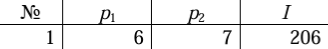

In [ ]:
var1 = {p1: 6, p2:7, I:206}

In [ ]:
# Оптимальный объем потребления 1го блага
round(MV[x1].subs(var1),2)

17.17

In [ ]:
# Оптимальный объем потребления 2го блага
round(MV[x2].subs(var1),2)

14.71

In [ ]:
# Числовое значение множителя лагранжа
round(MV[lmd].subs(var1),2)
# Насколько изменится максимум полезности в ответ на прирост
# доходап потребителя на единицу

0.08

In [ ]:
# Соответствующий максимум полезности
round(U.subs(var1),2)

15.89

In [ ]:
# Проверим это утверждение
round(U.subs({p1:6, p2:7, I:207}) - U.subs(var1),2)

0.08

In [ ]:
u1 = U.subs(var1)
u1

103⋅√42
───────
  42   

## Модель поведения потребителя по Хиксу


Спецификация модели:

$$c(x_1,x_2) = p_1 \times x_1 + p_2 \times x_2 \rightarrow min\\
u(x_1, x_2) = \sqrt{x_1 \times x_2} = u_0\\
x_1, x_2 \geq 0$$

Задача решается методом множителей Лагранжа:

$$
L(x_1, x_2, \lambda) = c(x_1, x_2) + \lambda \times [u_0  - u(x_1, x_2)]
$$

В этой задаче множитель Лагранжа имеет смысл прироста расхода потребителя(с) в ответ на увеличение желаемого уровня полезности($u_0$) на 1

In [ ]:
x1, x2 = sp.symbols('x_1,x_2') #levels
p1, p2 = sp.symbols('p_1,p_2') #prices
lmd = sp.symbols('lambda') #multip

u = sp.sqrt(x1 * x2) # util func
c = p1*x1 + p2*x2 # cost func

I = sp.symbols('I')
u0 = sp.symbols('u_0')
L = c+lmd*(u0-u)
L

  ⎛       _______⎞                
λ⋅⎝u₀ - ╲╱ x₁⋅x₂ ⎠ + p₁⋅x₁ + p₂⋅x₂

In [ ]:
H = sp.solve([L.diff(x1),L.diff(x2), L.diff(lmd)],[x1,x2,lmd], dict = True)[1];
H

⎧                                               ____⎫
⎪        2⋅p₁⋅u₀              u₀               ╱ p₁ ⎪
⎪λ: ─────────────────, x₁: ────────, x₂: u₀⋅  ╱  ── ⎪
⎨       ____    _____          ____         ╲╱   p₂ ⎬
⎪      ╱ p₁    ╱   2          ╱ p₁                  ⎪
⎪     ╱  ── ⋅╲╱  u₀          ╱  ──                  ⎪
⎩   ╲╱   p₂                ╲╱   p₂                  ⎭

In [ ]:
# Функция оптимального спроса на первое благо по H
H[x1]

   u₀   
────────
    ____
   ╱ p₁ 
  ╱  ── 
╲╱   p₂ 

In [ ]:
# Функция оптимального спроса на второе благо по H
H[x2]

       ____
      ╱ p₁ 
u₀⋅  ╱  ── 
   ╲╱   p₂ 

In [ ]:
# Функция лагранжа
H[lmd]

     2⋅p₁⋅u₀     
─────────────────
    ____    _____
   ╱ p₁    ╱   2 
  ╱  ── ⋅╲╱  u₀  
╲╱   p₂          

In [ ]:
# Косвенная функция расходов
C = c.subs(H); C

                     ____
 p₁⋅u₀              ╱ p₁ 
──────── + p₂⋅u₀⋅  ╱  ── 
    ____         ╲╱   p₂ 
   ╱ p₁                  
  ╱  ──                  
╲╱   p₂                  

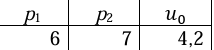

In [ ]:
var1 = {p1: 6, p2:7, u0:4.2}

In [ ]:
# Оптимальный объем потребления 1го блага
round(H[x1].subs(var1),2)

4.54

In [ ]:
# Оптимальный объем потребления 2го блага
round(H[x2].subs(var1),2)

3.89

In [ ]:
# Числовое значение множителя лагранжа
round(H[lmd].subs(var1),2)
# В этой задаче множитель Лагранжа имеет смысл прироста расхода потребителя(с)
#в ответ на увеличение желаемого уровня полезности($u_0$) на 1

12.96

In [ ]:
# Соответствующий максимум полезности
round(C.subs(var1),2)

54.44

In [ ]:
# Проверим это утверждение
round(C.subs({p1:6, p2:7, u0:5.2}) - C.subs(var1),2)

12.96

In [ ]:
a1,a2,al,bet = sp.symbols('a_1,a_2,alpha,beta')
u = (x1 - a1)**(al)*(x2-a2)**bet
u

          α           β
(-a₁ + x₁) ⋅(-a₂ + x₂) 

In [ ]:
c = p1*x1 + p2*x2 # cost func

I = sp.symbols('I')
u0 = sp.symbols('u_0')
L = c+lmd*(u0-u)
L

  ⎛               α           β⎞                
λ⋅⎝u₀ - (-a₁ + x₁) ⋅(-a₂ + x₂) ⎠ + p₁⋅x₁ + p₂⋅x₂